<a href="https://colab.research.google.com/github/Johnnyr81/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
# Mean 

mean = (3505+ 2400+ 3027+ 2798+ 3700+ 3250+ 2689)/7
mean


3052.714285714286

In [2]:
sum = (((3505-3052)**2)+((2400-3052)**2)+((3027-3052)**2)+((2798-3052)**2)+((3700-3052)**2)+((3250-3052)**2)+((2689-3052)**2))
sum

1286331

In [3]:
# Variance

variance = sum/7
variance

183761.57142857142

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

variance_one= [3505,2400,3027,2798,3700,3250,2689]

variance_data = {'v1': variance_one}

variance_df = pd.DataFrame(variance_data)

variance_df.head()

,v1
0,3505
1,2400
2,3027
3,2798
4,3700


In [5]:
v1_mean = variance_df.v1.mean()
print("v1 mean: ", v1_mean)

variance_df['v1_distance'] = variance_df.v1-v1_mean
variance_df.head()

v1 mean:  3052.714285714286


,v1,v1_distance
0,3505,452.285714
1,2400,-652.714286
2,3027,-25.714286
3,2798,-254.714286
4,3700,647.285714


In [6]:
variance_df['v1_squared_distance'] = variance_df.v1_distance**2
variance_df.head()

,v1,v1_distance,v1_squared_distance
0,3505,452.285714,204562.367347
1,2400,-652.714286,426035.938776
2,3027,-25.714286,661.224490
3,2798,-254.714286,64879.367347
4,3700,647.285714,418978.795918


In [7]:
# Variance

observations = len(variance_df)
print("Number of Observations: ", observations)

Variance_One = variance_df.v1_squared_distance.sum()/observations

print("Variance One: ", Variance_One)

Number of Observations:  7
Variance One:  183761.06122448976


In [8]:
print(variance_df.v1.var())

214387.90476190473


In [13]:
# SD
print(variance_df.v1.std(ddof=0))

428.67360686714756


In [12]:
import math
math.sqrt(Variance_One)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

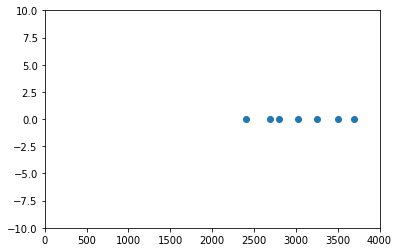

In [22]:
sales= [3505,2400,3027,2798,3700,3250,2689]
cust= [127,80,105,92,120,115,93]


comb_data = {"sales": sales, "customers": cust,}

df = pd.DataFrame(comb_data)
df['zeros'] = pd.Series(list(np.zeros(7)))

plt.scatter(df.sales,df['zeros'])
plt.xlim(0,4000)
plt.ylim(-10,10)
plt.show()



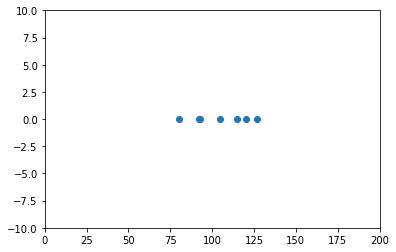

In [25]:
plt.scatter(df.customers,df['zeros'])
plt.xlim(0,200)
plt.ylim(-10,10)
plt.show()

In [0]:
# Positive covariance

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [30]:
cust= [127,80,105,92,120,115,93]

cust_data = {'c1': cust}

cust_df = pd.DataFrame(cust_data)

cust_df.head()

,c1
0,127
1,80
2,105
3,92
4,120


In [44]:
sd_sale = variance_df.v1.std(ddof=0)
sd_sale

428.67360686714756

In [45]:
sd_cust = cust_df.c1.std(ddof=0)
sd_cust

15.792015549069118

### ASK HERE finding covariance, cov(x,y)/(std x * std y)

In [47]:
# Correlation Coefficient

(7604.357143)/((sd_cust)*(sd_sale))

1.1233063074718088

In [27]:
df.head()

,sales,customers,zeros
0,3505,127,0.0
1,2400,80,0.0
2,3027,105,0.0
3,2798,92,0.0
4,3700,120,0.0


In [28]:
df.cov()

,sales,customers,zeros
sales,214387.904762,7604.357143,0.0
customers,7604.357143,290.952381,0.0
zeros,0.000000,0.000000,0.0


In [29]:
df.corr()

,sales,customers,zeros
sales,1.000000,0.962834,NaN
customers,0.962834,1.000000,NaN
zeros,NaN,NaN,NaN


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

### NOT FINISHED, comeback

In [0]:
tt = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
tt.head();

In [62]:
tt2 = tt.select_dtypes(include=['number'])

tt2.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

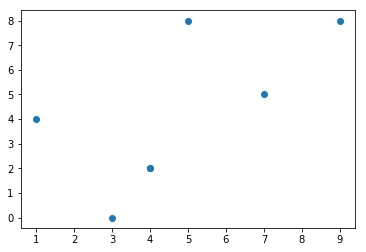

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()